"SPL Vertical"													
 ['On-Axis', '10°', '20°', '30°', '40°', '50°', '60°']


<AxesSubplot:xlabel='Frequency'>

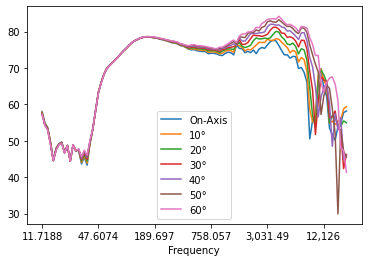

In [21]:
import numpy as np
import pandas as pd

path = 'bose.txt'
file = open(path, encoding='UTF-8')
headers = file.readlines()[:3]
title = headers[0]
curves = headers[1].split('\t\t')
# modify every element in an array
curves = [c.replace('"', '').strip() for c in curves]
# curves.insert(0, "Frequency")
print(title, curves)

dtbl = pd.read_table(path,  skiprows=2)
freq = dtbl.iloc[:, 0]
dtbl = dtbl.iloc[:, [i%2==1 for i in range(len(dtbl.columns))]]
dtbl.columns = curves
dtbl['Frequency'] = freq

dtbl.plot(x = "Frequency")

## offset

<AxesSubplot:xlabel='Frequency'>

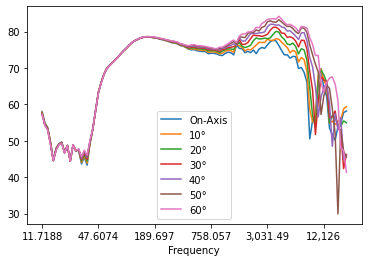

In [24]:
dtbl2 = dtbl

offset = 10
dtbl2.iloc[:, 0:-1] = dtbl2.iloc[:, 0:-1].apply(lambda x: x+offset)

dtbl2.plot(x = "Frequency")

In [25]:
dtbl['Frequency']

0       11.7188
1       12.4512
2        13.916
3       14.6484
4       15.3809
         ...   
104    15,999.8
105    17,148.2
106    18,379.4
107    19,698.5
108    19,999.5
Name: Frequency, Length: 109, dtype: object

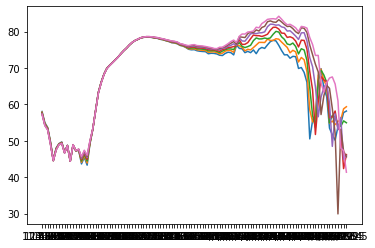

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
lines = []

for col in dtbl.columns[:-1]:
  line = ax.plot(dtbl["Frequency"], dtbl[col], label=col)
  lines.append(line)
